# 全世界株式(ACWI)の年次リターンと成長率

算術平均リターン（年率）: 6.99%
幾何平均リターン（年率）: 5.93%
近似幾何平均リターン（年率）: 5.84%
標準偏差（年率）: 15.13%


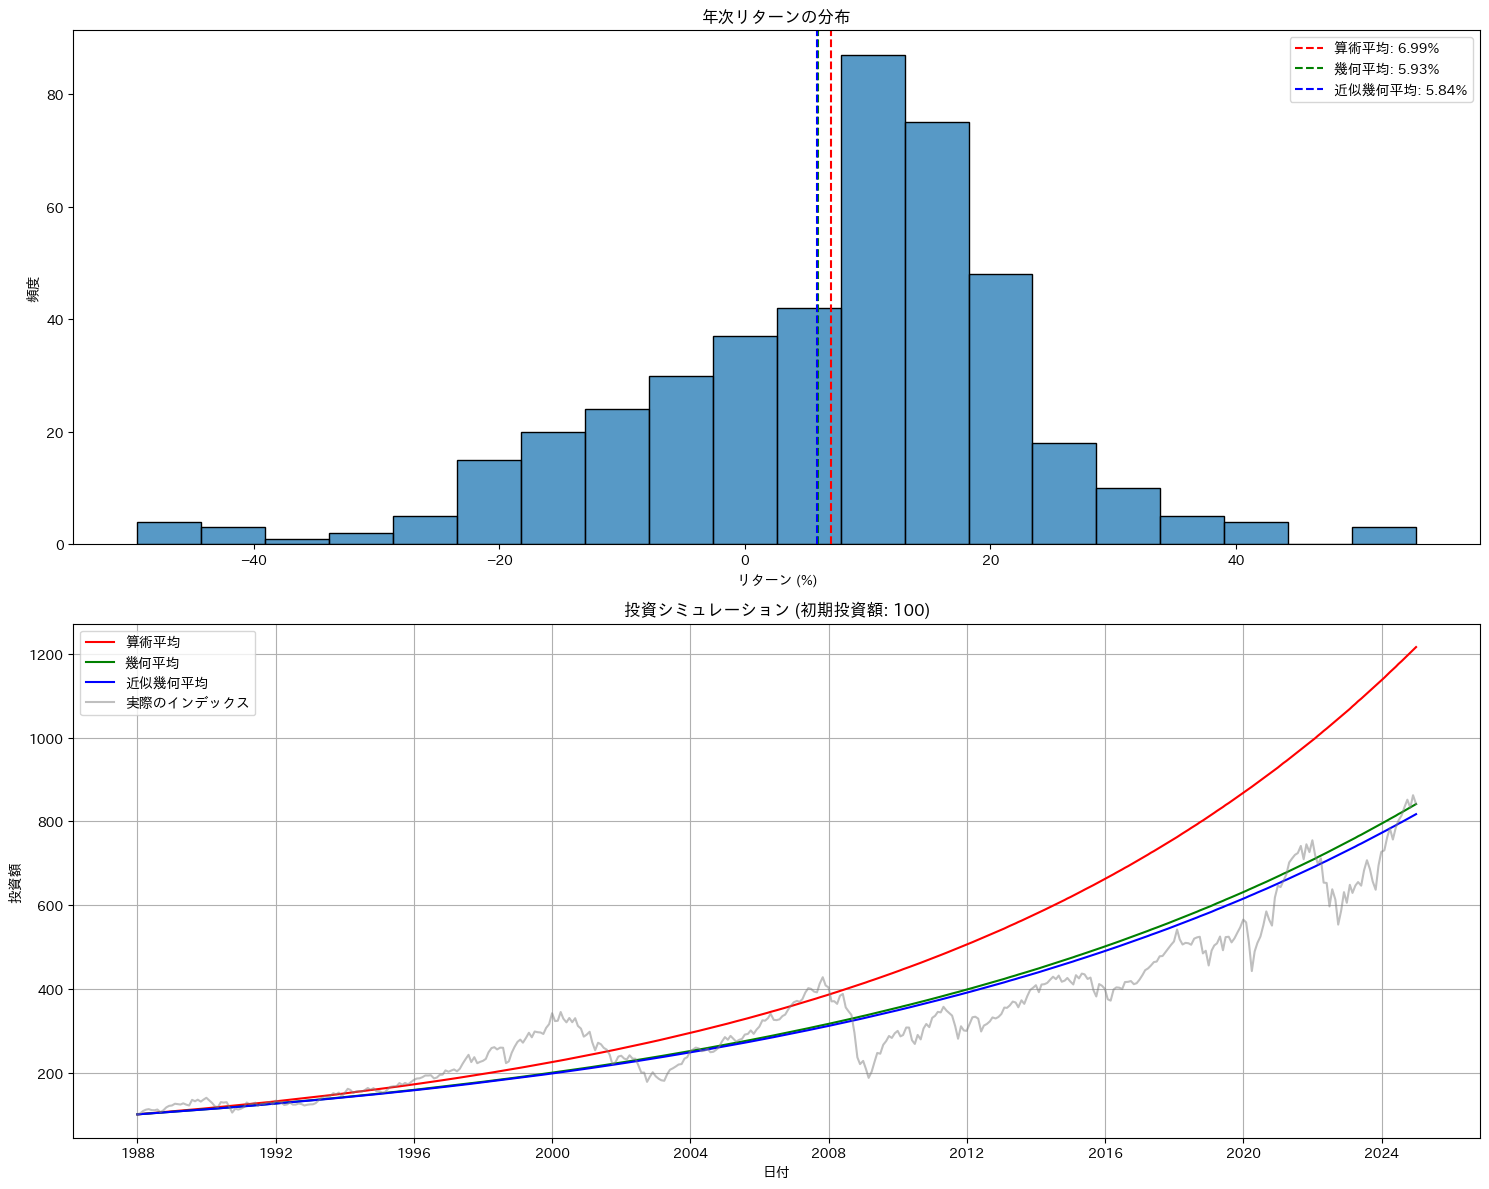

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def load_and_prepare_data(file_path, start_date):
    # データ読み込みと前処理
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
    df = df[df['Date'] >= start_date]
    df.rename(columns={'ACWI Standard (Large+Mid Cap)': 'ACWI'}, inplace=True)
    
    # 月次リターンの計算
    df['Monthly_Return'] = df['ACWI'].pct_change()
    
    # 年次リターン計算（12ヶ月間の変化率）
    df['Annual_Return'] = (df['ACWI'].pct_change(periods=12)) * 100
    df['Year'] = df['Date'].dt.year
    
    return df

def calculate_returns_statistics(df):
    # 月次リターンの統計量計算
    monthly_returns = df['Monthly_Return'].dropna()
    
    # 月次の標準偏差を年率換算
    monthly_std = monthly_returns.std()
    annual_std = monthly_std * np.sqrt(12)
    
    # 年次リターンの算術平均
    annual_returns = df['Annual_Return'].dropna()
    arithmetic_mean = annual_returns.mean()
    
    # 幾何平均リターンの計算（月次データから年率換算）
    monthly_geometric_mean = (1 + monthly_returns).prod() ** (1/len(monthly_returns)) - 1
    geometric_mean = ((1 + monthly_geometric_mean) ** 12 - 1) * 100
    
    # 近似幾何平均の計算（月次データから年率換算）
    # 正しい計算式: μ_g ≈ μ_a - σ²/2 （μ_aは年率の算術平均、σ²は年率の分散）
    approx_geometric_mean = arithmetic_mean - ((annual_std) ** 2 * 100) / 2
    
    return arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std * 100

def plot_returns_analysis(df, arithmetic_mean, geometric_mean, approx_geometric_mean):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 年次リターンの分布プロット
    annual_returns = df['Annual_Return'].dropna()
    sns.histplot(data=annual_returns, bins=20, ax=ax1)
    ax1.axvline(arithmetic_mean, color='red', linestyle='--', 
                label=f'算術平均: {arithmetic_mean:.2f}%')
    ax1.axvline(geometric_mean, color='green', linestyle='--', 
                label=f'幾何平均: {geometric_mean:.2f}%')
    ax1.axvline(approx_geometric_mean, color='blue', linestyle='--', 
                label=f'近似幾何平均: {approx_geometric_mean:.2f}%')
    ax1.set_title('年次リターンの分布')
    ax1.set_xlabel('リターン (%)')
    ax1.set_ylabel('頻度')
    ax1.legend()
    
    # 投資シミュレーション（月次で複利計算）
    initial_investment = 100
    months = np.arange(0, len(df))
    
    # 各平均リターンを月次に変換
    monthly_arithmetic = (1 + arithmetic_mean/100) ** (1/12) - 1
    monthly_geometric = (1 + geometric_mean/100) ** (1/12) - 1
    monthly_approx_geometric = (1 + approx_geometric_mean/100) ** (1/12) - 1
    
    for return_value, label, color in [
        (monthly_arithmetic, '算術平均', 'red'),
        (monthly_geometric, '幾何平均', 'green'),
        (monthly_approx_geometric, '近似幾何平均', 'blue')
    ]:
        investment = initial_investment * (1 + return_value) ** months
        ax2.plot(df['Date'], investment, label=f'{label}', color=color)
    
    # 実際の指数の推移も追加
    normalized_index = df['ACWI'] / df['ACWI'].iloc[0] * initial_investment
    ax2.plot(df['Date'], normalized_index, label='実際のインデックス', color='gray', alpha=0.5)
    
    ax2.set_title('投資シミュレーション (初期投資額: 100)')
    ax2.set_xlabel('日付')
    ax2.set_ylabel('投資額')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def main():
    # データ準備
    df = load_and_prepare_data('data/ACWI.csv', '1987-12-31')
        
    # 統計量計算
    arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std = calculate_returns_statistics(df)
    
    # 結果表示
    print(f"算術平均リターン（年率）: {arithmetic_mean:.2f}%")
    print(f"幾何平均リターン（年率）: {geometric_mean:.2f}%")
    print(f"近似幾何平均リターン（年率）: {approx_geometric_mean:.2f}%")
    print(f"標準偏差（年率）: {annual_std:.2f}%")
    
    # プロット
    fig = plot_returns_analysis(df, arithmetic_mean, geometric_mean, approx_geometric_mean)
    plt.show()

if __name__ == "__main__":
    main()

# 為替の時間推移

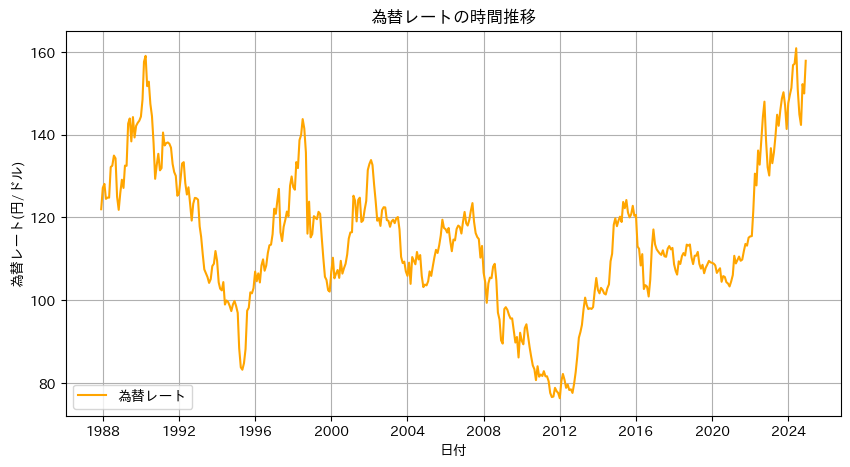

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応


# CSVファイルの読み込み - 必要に応じてencodingを指定
df_rate = pd.read_csv('data/fm08_m_1.csv', header=None)

# 最初の列を日付として解析
df_rate.iloc[:, 0] = pd.to_datetime(df_rate.iloc[:, 0], format='%Y/%m', errors='coerce')

# 1987年12月以降の日付をTimestampに変換
cutoff_date = pd.to_datetime('1987-12')

# 1987年12月以降のデータでフィルタリング
df_rate = df_rate[df_rate.iloc[:, 0] >= cutoff_date]

# プロット
plt.figure(figsize=(10, 5))
plt.plot(df_rate.iloc[:, 0], df_rate.iloc[:, 1], label='為替レート', color='orange')
plt.title('為替レートの時間推移')
plt.xlabel('日付')
plt.ylabel('為替レート(円/ドル)')
plt.grid(True)
plt.legend()
plt.show()





# 為替を考慮した全世界株式(ACWI)の年次リターンと成長率

算術平均リターン（年率）: 8.10%
幾何平均リターン（年率）: 6.67%
近似幾何平均リターン（年率）: 6.62%
標準偏差（年率）: 17.17%


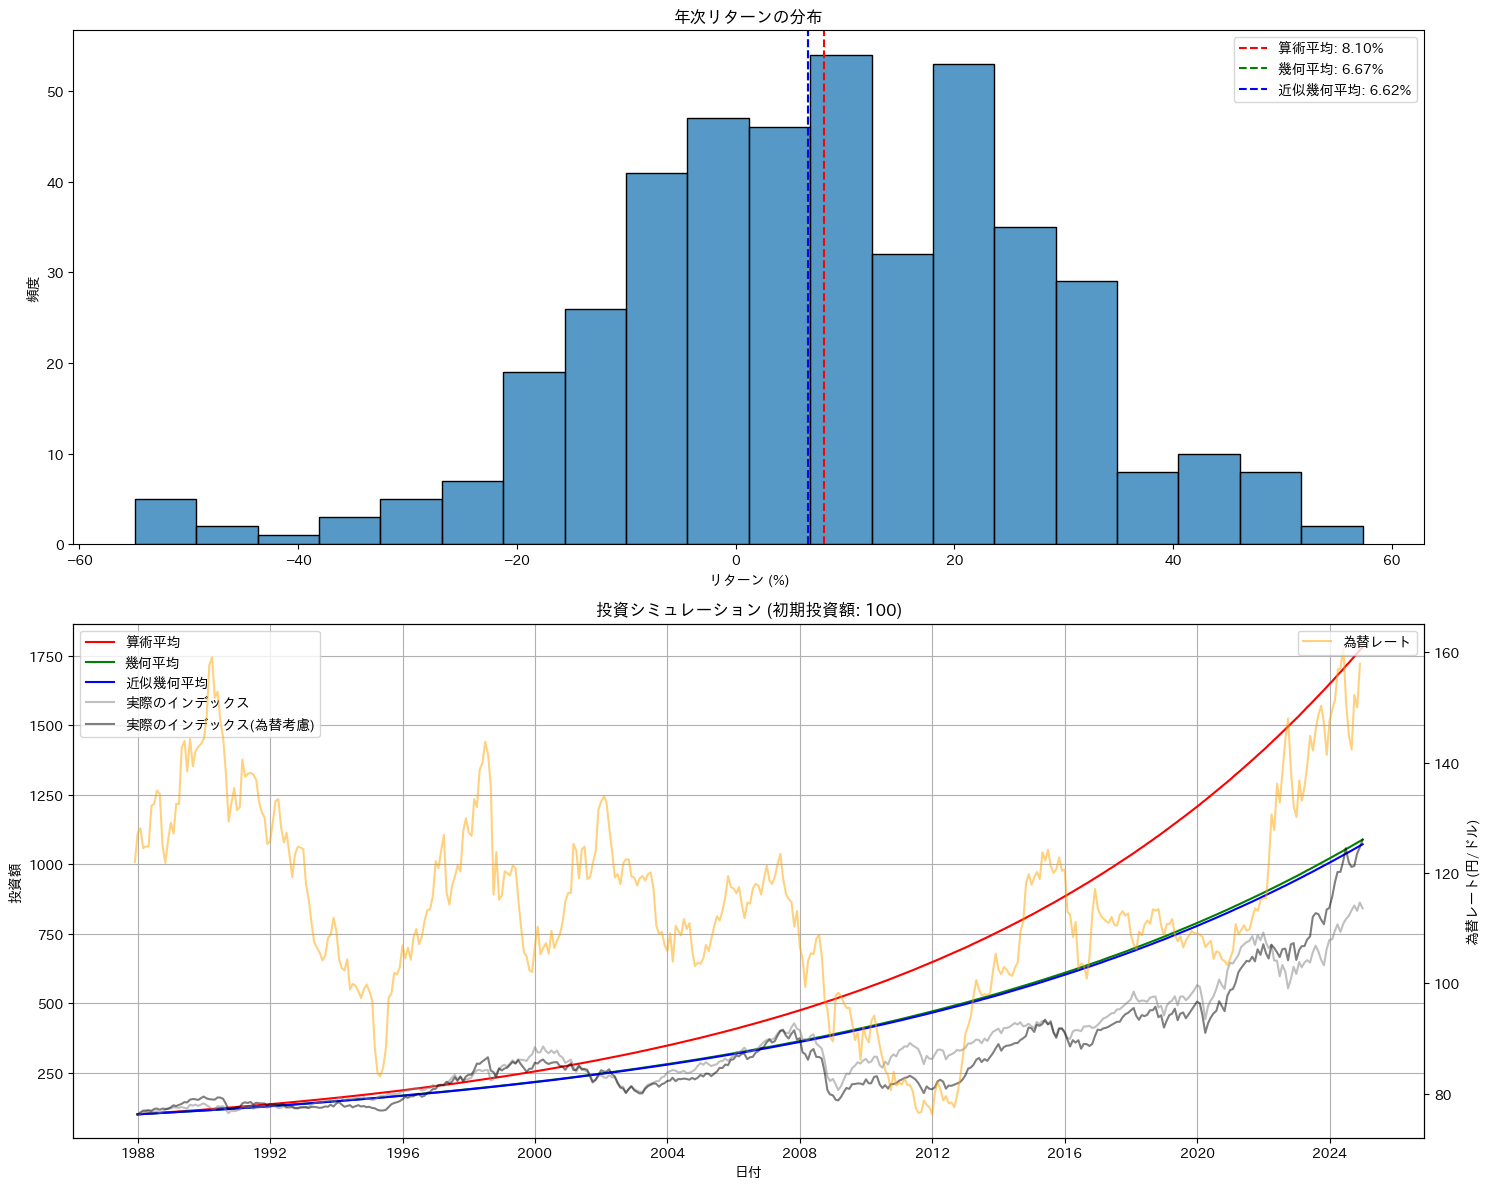

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(df_index, df_rate, start_date):
    # index読み込みと前処理
    df = pd.read_csv(df_index)
    df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
    df = df[df['Date'] >= start_date]
    df.rename(columns={'ACWI Standard (Large+Mid Cap)': 'ACWI'}, inplace=True)

    # 為替の読み込みと前処理 
    df_rate = pd.read_csv(df_rate, header=None)
    # 最初の列を日付として解析
    df_rate.iloc[:, 0] = pd.to_datetime(df_rate.iloc[:, 0], format='%Y/%m', errors='coerce')
    # 1987年12月以降の日付をTimestampに変換
    cutoff_date = pd.to_datetime(start_date)
    # 1987年12月以降のデータでフィルタリング
    df_rate = df_rate[df_rate.iloc[:, 0] >= cutoff_date]

    # 為替を考慮したACWI_yen列の追加
    df['ACWI_yen'] = df['ACWI'] * df_rate.iloc[:, 1].values
    
    # 月次リターンの計算
    df['Monthly_Return'] = df['ACWI_yen'].pct_change()
    
    # 年次リターン計算（12ヶ月間の変化率）
    df['Annual_Return'] = (df['ACWI_yen'].pct_change(periods=12)) * 100
    df['Year'] = df['Date'].dt.year
    
    return df

def calculate_returns_statistics(df):
    # 月次リターンの統計量計算
    monthly_returns = df['Monthly_Return'].dropna()
    
    # 月次の標準偏差を年率換算
    monthly_std = monthly_returns.std()
    annual_std = monthly_std * np.sqrt(12)
    
    # 年次リターンの算術平均
    annual_returns = df['Annual_Return'].dropna()
    arithmetic_mean = annual_returns.mean()
    
    # 幾何平均リターンの計算（月次データから年率換算）
    monthly_geometric_mean = (1 + monthly_returns).prod() ** (1/len(monthly_returns)) - 1
    geometric_mean = ((1 + monthly_geometric_mean) ** 12 - 1) * 100
    
    # 近似幾何平均の計算（月次データから年率換算）
    # 正しい計算式: μ_g ≈ μ_a - σ²/2 （μ_aは年率の算術平均、σ²は年率の分散）
    approx_geometric_mean = arithmetic_mean - ((annual_std) ** 2 * 100) / 2
    
    return arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std * 100

def plot_returns_analysis(df, df_rate, arithmetic_mean, geometric_mean, approx_geometric_mean):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 年次リターンの分布プロット
    annual_returns = df['Annual_Return'].dropna()
    sns.histplot(data=annual_returns, bins=20, ax=ax1)
    ax1.axvline(arithmetic_mean, color='red', linestyle='--', 
                label=f'算術平均: {arithmetic_mean:.2f}%')
    ax1.axvline(geometric_mean, color='green', linestyle='--', 
                label=f'幾何平均: {geometric_mean:.2f}%')
    ax1.axvline(approx_geometric_mean, color='blue', linestyle='--', 
                label=f'近似幾何平均: {approx_geometric_mean:.2f}%')
    ax1.set_title('年次リターンの分布')
    ax1.set_xlabel('リターン (%)')
    ax1.set_ylabel('頻度')
    ax1.legend()
    
    # 投資シミュレーション（月次で複利計算）
    initial_investment = 100
    months = np.arange(0, len(df))
    
    # 各平均リターンを月次に変換
    monthly_arithmetic = (1 + arithmetic_mean/100) ** (1/12) - 1
    monthly_geometric = (1 + geometric_mean/100) ** (1/12) - 1
    monthly_approx_geometric = (1 + approx_geometric_mean/100) ** (1/12) - 1
    
    for return_value, label, color in [
        (monthly_arithmetic, '算術平均', 'red'),
        (monthly_geometric, '幾何平均', 'green'),
        (monthly_approx_geometric, '近似幾何平均', 'blue')
    ]:
        investment = initial_investment * (1 + return_value) ** months
        ax2.plot(df['Date'], investment, label=f'{label}', color=color)
    
    # 実際の指数の推移も追加
    normalized_index = df['ACWI'] / df['ACWI'].iloc[0] * initial_investment
    normalized_index_yen = df['ACWI_yen'] / df['ACWI_yen'].iloc[0] * initial_investment
    ax2.plot(df['Date'], normalized_index, label='実際のインデックス', color='gray', alpha=0.5)
    ax2.plot(df['Date'], normalized_index_yen, label='実際のインデックス(為替考慮)', color='black', alpha=0.5)


    # 為替を右軸に追加
    ax2_rate = ax2.twinx()
    ax2_rate.plot(df_rate.iloc[:, 0], df_rate.iloc[:, 1], label='為替レート', color='orange', alpha=0.5)
    
    ax2.set_title('投資シミュレーション (初期投資額: 100)')
    ax2.set_xlabel('日付')
    ax2.set_ylabel('投資額')
    ax2.legend()
    ax2_rate.set_ylabel('為替レート(円/ドル)')
    # loc='upper right' で凡例を右上に表示
    ax2_rate.legend(loc='upper right')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def main():
    # データ準備
    df = load_and_prepare_data(df_index='data/ACWI.csv', df_rate='data/fm08_m_1.csv', start_date='1987-12')
    
    # 統計量計算
    arithmetic_mean, geometric_mean, approx_geometric_mean, annual_std = calculate_returns_statistics(df)
    
    # 結果表示
    print(f"算術平均リターン（年率）: {arithmetic_mean:.2f}%")
    print(f"幾何平均リターン（年率）: {geometric_mean:.2f}%")
    print(f"近似幾何平均リターン（年率）: {approx_geometric_mean:.2f}%")
    print(f"標準偏差（年率）: {annual_std:.2f}%")
    
    # プロット
    fig = plot_returns_analysis(df, df_rate, arithmetic_mean, geometric_mean, approx_geometric_mean)
    plt.show()

if __name__ == "__main__":
    main()